# Importantando bibliotecas

In [354]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Semente

In [355]:
SEED = 42

# Objetivo

O objetivo teste modelo é predizer se, de acordo com as características da pessoa (frequência que vai a museus, quais tipos de obra gosta mais, se acompanha artístas, entre outras), ela usaria nosso aplicativo ou não, levando em consideração do que a pessoa gosta e como é sua experiência ao visitar um museu e o que nosso aplicativo oferece de funcionalidades.

#### Modelo

Um modelo criado neste contexto precisa levar então em consideração algumas coisas:

- Pessoas mais propensas em usar o Leontis, possuem mais características do público alvo e por isso é interessante adicionar pesos as características mais relevantes, essas são:

    + <strong>Tipo de arte que mais gosta:</strong> pinturas e fotografias têm mais a ver com nosso foco atualmente, indivíduos que se interessam mais por arte de rua ou arte digital, podem não achar o aplicativo interessante por abordar outro conteúdo;
    + <strong>Frequência que vai a museus:</strong> extremamente importante, pessoas que nunca vão ou vão raramente, é difícil instalarem um app sobre arte e de idas a museus;
    + <strong>Guia:</strong> informação valiosa em nosso contexto, uma das principais funcionalidades é justamente o guia de museu. Caso não utilize atualmente, improvável de usar no app, diminuindo assim a chance de instalarem;
    + <strong>Motivos:</strong> Leontis sendo uma plataforma de cultura e aprendizado, pessoas com interesse maior em aprender ou se inspirarem quando vão a museus, podem gostar mais do aplicativo;
    + <strong>Falta de informação:</strong> uma das perguntas mais importantes. Outra principal funcionalidade é o scanner, que serve para facilitar sua experiência no museu, quando sentir falta de informação da obra, escaneando-a o app te retorna mais informações. Porém isto se torna inútil caso o indivíduo se sinta satisfeito com o que é passado no museu;
    + <strong>Procurar informações:</strong> se a pessoa não tem costume de procurar essas informações, dificilmente usará o scanner mesmo não ficando satisafeito com o que é passado;
    + <strong>Achar informações:</strong> também, se atualmente ela pesquisa e encontra o que queria, é mais difícil de procurar um meio alternativo de busca.

- Claro que o ideal é ter um modelo balançeado, ou seja, para cada classe ter uma boa performance de predição contendo pequenos erros para que não fique viciado. Porém, em nosso contexto, é mais importante acertar quem realmente usaria nosso aplicativo, do que errar dizendo que não é um possível usuário mesmo sendo. Ou seja, é melhor o modelo predizer pra menos o número de possíveis usuários, do que pra mais, focando em definir que quem o modelo predisse que é um possível usuário, realmente seja, e predizendo que não era um possível usuário mesmo sendo, é menos relevante.

# Carregando base e escolhendo colunas

In [356]:
dados = pd.read_excel('dados_possiveis_usuarios_c_label.xlsx')
dados.head()

,ID,Hora de início,Hora de conclusão,E-mail,Nome,Hora da última modificação,Em qual faixa etária você se encaixa?,Com qual gênero você se identifica?,Qual seu nível de formação atual?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),...,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Usaria o aplicativo?
0,1,2024-08-16 11:18:14,2024-08-16 11:20:21,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classes D/E: até R$ 2,9 mil",...,Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,Não
1,2,2024-08-16 12:18:44,2024-08-16 12:19:31,anonymous,NaN,NaN,Entre 25 e 35 anos,Feminino,Ensino superior concluído,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não
2,3,2024-08-16 12:19:26,2024-08-16 12:20:28,anonymous,NaN,NaN,Menos de 18 anos,Feminino,Cursando ensino médio,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",...,Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,Não
3,4,2024-08-16 12:19:24,2024-08-16 12:20:34,anonymous,NaN,NaN,Menos de 18 anos,Masculino,Cursando ensino médio,"Classe B: entre R$ 7,1 mil e R$ 22 mil",...,Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,Não
4,5,2024-08-16 12:19:43,2024-08-16 12:21:36,anonymous,NaN,NaN,Entre 46 e 59 anos,Masculino,Ensino superior concluído,Classe A: superior a R$ 22 mil,...,Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,Não


In [357]:
dados.columns

Index(['ID', 'Hora de início', 'Hora de conclusão', 'E-mail', 'Nome',
       'Hora da última modificação', 'Em qual faixa etária você se encaixa?',
       'Com qual gênero você se identifica?',
       'Qual seu nível de formação atual?',
       'Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas)',
       'Há quanto tempo você se interessa por arte?',
       'Qual das opções de arte abaixo você mais gosta?',
       'Com que frequência você vai aos museus?',
       'Você já participou de algum curso ou atividade relacionada à arte?',
       'Você segue artístas ou páginas relacionadas à arte nas rede sociais?',
       'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.',
       'Você já usou um aplicativo de um museu ou relacionado à arte?',
       'O que mais te atrai em visitar museus ou exposições de arte?',
   

In [358]:
dados = dados.drop(columns=['ID', 'Hora de início', 'Hora de conclusão', 'E-mail', 'Nome',
       'Hora da última modificação', 'Com qual gênero você se identifica?', 'Qual seu nível de formação atual?'])
dados

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?,Usaria o aplicativo?
0,Menos de 18 anos,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,Não
1,Entre 25 e 35 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Não
2,Menos de 18 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,Não
3,Menos de 18 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,Não
4,Entre 46 e 59 anos,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,Não
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,60+ anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Há mais de 10 anos,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Não,Sem um guia/planejamento para ver as obras.,Não,Inspiração,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,Não
244,Entre 25 e 35 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Estou iniciando agora,Pintura,Raramente (uma vez ao ano),Não,Não,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN,Não
245,Menos de 18 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Inspiração,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não,Não
246,Entre 36 e 45 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Menos de 2 anos,Arte digital,Raramente (uma vez ao ano),Não,Não,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN,Não


In [359]:
df_y, df_x = dados['Usaria o aplicativo?'], dados.drop(columns=['Usaria o aplicativo?'])
display(df_x.head())
display(df_y.head())

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,Menos de 18 anos,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não
1,Entre 25 e 35 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Menos de 18 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN
3,Menos de 18 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN
4,Entre 46 e 59 anos,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN


0    Não
1    Não
2    Não
3    Não
4    Não
Name: Usaria o aplicativo?, dtype: object

# Modelos de exploração (testando diferentes tipos de algoritmos)

Primeiro vamos explorar alguns dos algoritmos de modelo supervisionado sem adicionar os pesos as características

## Tratando dataframe

In [360]:
from sklearn.preprocessing import LabelEncoder


for i in df_x:
    le_x = LabelEncoder()
    df_x[i] = le_x.fit_transform(df_x[i])

le_y = LabelEncoder()

df_y = le_y.fit_transform(df_y)

display(df_x.head())
display(df_y)

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,5,3,4,4,4,0,1,2,0,3,1,1,3,0
1,2,2,5,6,5,2,2,4,2,5,2,2,6,2
2,5,2,0,3,3,1,1,2,0,1,0,2,6,2
3,5,1,2,5,3,0,1,2,0,3,1,0,6,2
4,4,0,3,4,1,1,0,1,1,2,1,0,6,2


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0])

## Dividindo entre treino e teste

In [361]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.25, random_state=SEED)

display(x_train)
display(y_train)
display(x_test)
display(y_test)

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
101,5,2,5,6,5,2,2,4,2,5,2,2,6,2
198,3,2,5,6,5,2,2,4,2,5,2,2,6,2
126,5,0,5,6,5,2,2,4,2,5,2,2,6,2
69,5,1,3,4,4,1,1,2,0,3,0,2,6,2
201,2,2,5,6,5,2,2,4,2,5,2,2,6,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106,3,2,3,4,4,1,1,0,0,2,1,1,3,0
14,5,1,1,5,3,0,1,2,0,3,1,1,3,0
92,2,2,3,2,4,0,1,2,0,3,1,1,5,1
179,3,0,3,4,3,1,1,0,1,3,1,0,6,2


array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
33,5,2,0,4,2,0,1,2,0,2,0,2,6,2
6,3,0,5,6,5,2,2,4,2,5,2,2,6,2
182,2,2,1,4,3,0,0,1,0,3,1,1,3,1
86,5,1,5,6,5,2,2,4,2,5,2,2,6,2
156,5,2,0,5,4,0,1,0,0,2,1,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193,2,1,5,6,5,2,2,4,2,5,2,2,6,2
97,1,2,0,3,0,1,1,1,0,2,1,1,3,1
154,5,1,4,1,4,1,1,1,0,2,1,1,2,1
75,1,2,3,4,2,1,1,3,0,3,1,0,6,2


array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

## Naive Bayes

### Modelo

In [362]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
predicao_gnb = gnb.fit(x_train, y_train).predict(x_test)

display(predicao_gnb)

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0])

### Avaliando modelo

In [363]:
from sklearn.metrics import *

print(classification_report(y_test, predicao_gnb, target_names=list(le_y.classes_)))

              precision    recall  f1-score   support

         Não       1.00      0.80      0.89        49
         Sim       0.57      1.00      0.72        13

    accuracy                           0.84        62
   macro avg       0.78      0.90      0.80        62
weighted avg       0.91      0.84      0.85        62



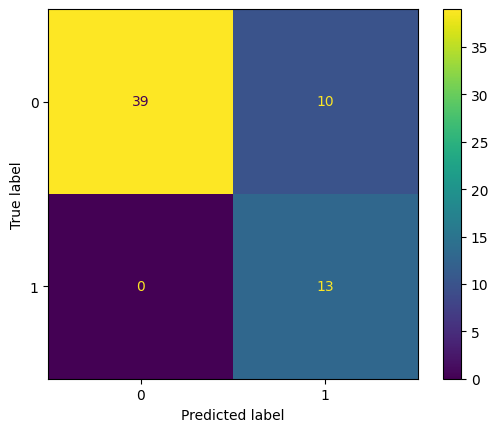

In [364]:
ConfusionMatrixDisplay(confusion_matrix(y_test, predicao_gnb)).plot()

Precision da classe 'Sim' está muito ruim, já que quase metade ele predisse ser 'Sim' mas pertencia a classe 'Não'. Isso pode ter acontecido pelo treino ter uma diferença de dados da classe 'Não' e da classe 'Sim' menor do que no teste.

### Kfold e Cross Validation


--- Fold 0 ---
              precision    recall  f1-score   support

         Não       1.00      0.82      0.90        57
         Sim       0.33      1.00      0.50         5

    accuracy                           0.84        62
   macro avg       0.67      0.91      0.70        62
weighted avg       0.95      0.84      0.87        62


--- Fold 1 ---
              precision    recall  f1-score   support

         Não       1.00      0.85      0.92        52
         Sim       0.56      1.00      0.71        10

    accuracy                           0.87        62
   macro avg       0.78      0.92      0.82        62
weighted avg       0.93      0.87      0.88        62


--- Fold 2 ---
              precision    recall  f1-score   support

         Não       1.00      0.76      0.86        46
         Sim       0.59      1.00      0.74        16

    accuracy                           0.82        62
   macro avg       0.80      0.88      0.80        62
weighted avg       0.89   

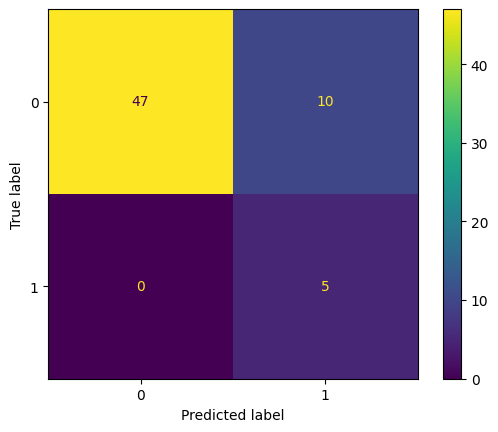

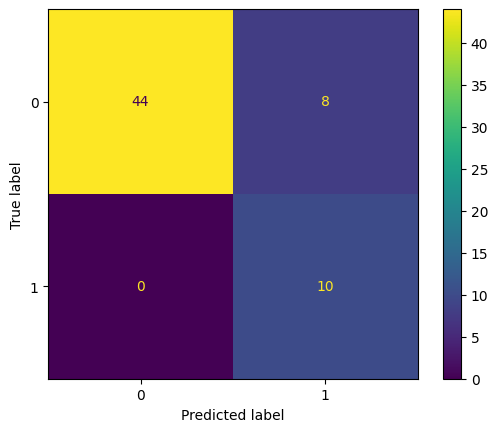

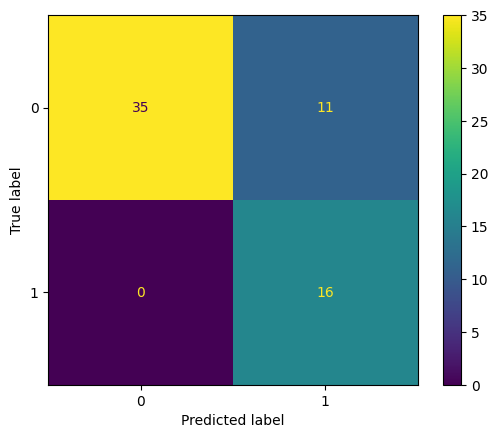

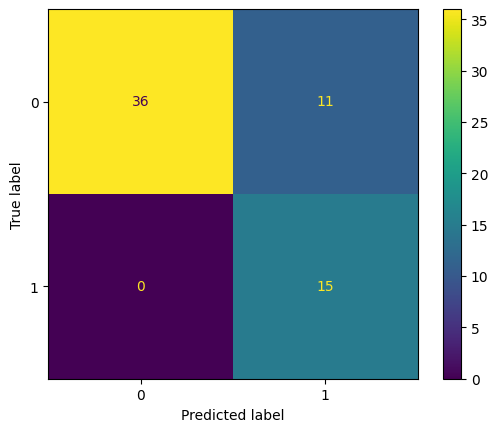

In [365]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=4, random_state=None, shuffle=False)
gnb = GaussianNB()

lista_acuracias = []
lista_precisions = []

for i, (train_index, test_index) in enumerate(kf.split(df_x)):
    # Separando treino e teste de x e y
    train_x, test_x = df_x.iloc[train_index], df_x.iloc[test_index]
    train_y, test_y = df_y[train_index], df_y[test_index]

    # Treinando o modelo
    gnb.fit(train_x, train_y)

    # Predict
    predict = gnb.predict(test_x)

    # Avaliando modelo
    lista_acuracias.append(accuracy_score(test_y, predict))
    lista_precisions.append(precision_score(test_y, predict, pos_label=1))
    print(f'\n--- Fold {i} ---')
    print(classification_report(test_y, predict, target_names=list(le_y.classes_)))
    matriz_confusao = confusion_matrix(test_y, predict)
    matriz_confusao_display = ConfusionMatrixDisplay(matriz_confusao)
    matriz_confusao_display.plot()

In [366]:
print('Acurácia média: ', sum(lista_acuracias)/len(lista_acuracias))
print('Precision médio do "Sim": ', sum(lista_precisions)/len(lista_precisions))

Acurácia média:  0.8387096774193549
Precision médio do "Sim":  0.5146011396011396


Mesmo agora usando Cross Validation e KFold, ele prediz que boa parte dos dados da classe 'Não' eram da classe 'Sim'. Resultado não esperado, já que possui bem menos dados da label 1.

## Regressão linear

### Modelo

In [367]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

predicao_lr = lr.fit(x_train, y_train).predict(x_test)

display(predicao_lr)

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0])

### Avaliando  modelo

In [368]:
from sklearn.metrics import *

print(classification_report(y_test, predicao_lr, target_names=list(le_y.classes_)))

              precision    recall  f1-score   support

         Não       0.90      0.88      0.89        49
         Sim       0.57      0.62      0.59        13

    accuracy                           0.82        62
   macro avg       0.73      0.75      0.74        62
weighted avg       0.83      0.82      0.82        62



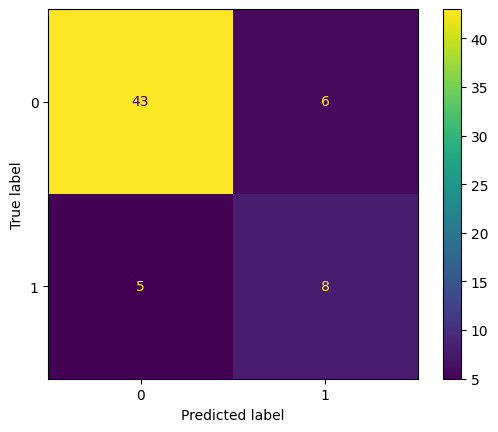

In [369]:
ConfusionMatrixDisplay(confusion_matrix(y_test, predicao_lr)).plot()

Este modelo teve uma péssima performance com a classe 'Sim', principalmente com seu Precision, nosso principal foco.

### Kfold e Cross Validation


--- Fold 0 ---
              precision    recall  f1-score   support

         Não       0.95      0.93      0.94        57
         Sim       0.33      0.40      0.36         5

    accuracy                           0.89        62
   macro avg       0.64      0.66      0.65        62
weighted avg       0.90      0.89      0.89        62


--- Fold 1 ---
              precision    recall  f1-score   support

         Não       0.94      0.92      0.93        52
         Sim       0.64      0.70      0.67        10

    accuracy                           0.89        62
   macro avg       0.79      0.81      0.80        62
weighted avg       0.89      0.89      0.89        62


--- Fold 2 ---
              precision    recall  f1-score   support

         Não       0.81      0.96      0.88        46
         Sim       0.75      0.38      0.50        16

    accuracy                           0.81        62
   macro avg       0.78      0.67      0.69        62
weighted avg       0.80   

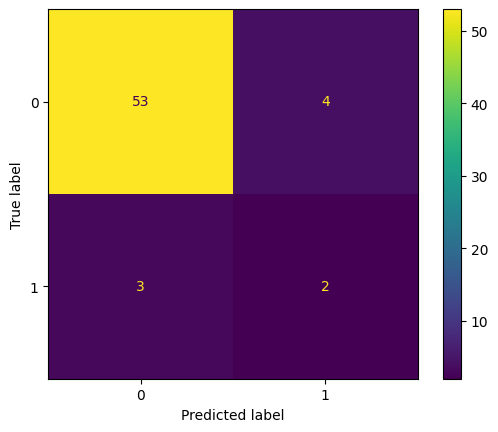

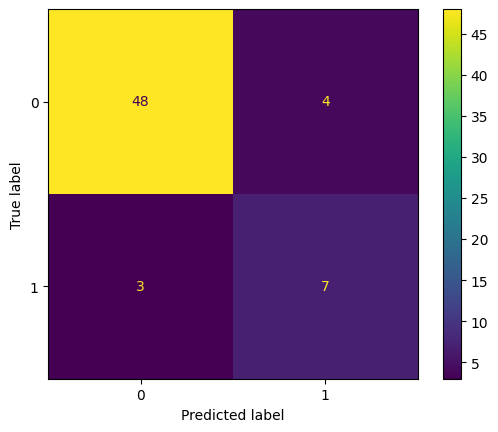

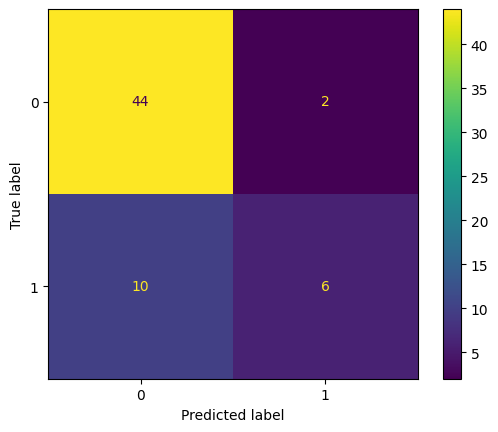

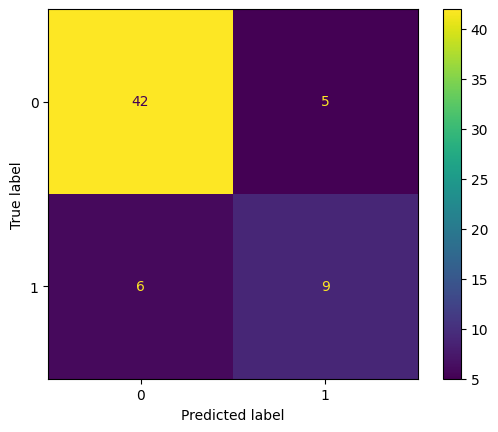

In [370]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=4, random_state=None, shuffle=False)
lr = LogisticRegression()

lista_acuracias = []
lista_precisions = []

for i, (train_index, test_index) in enumerate(kf.split(df_x)):
    # Separando treino e teste de x e y
    train_x, test_x = df_x.iloc[train_index], df_x.iloc[test_index]
    train_y, test_y = df_y[train_index], df_y[test_index]

    # Treinando o modelo
    lr.fit(train_x, train_y)

    # Predict
    predict = lr.predict(test_x)

    # Avaliando modelo
    lista_acuracias.append(accuracy_score(test_y, predict))
    lista_precisions.append(precision_score(test_y, predict, pos_label=1))
    print(f'\n--- Fold {i} ---')
    print(classification_report(test_y, predict, target_names=list(le_y.classes_)))
    matriz_confusao = confusion_matrix(test_y, predict)
    matriz_confusao_display = ConfusionMatrixDisplay(matriz_confusao)
    matriz_confusao_display.plot()

In [371]:
print('Acurácia média: ', sum(lista_acuracias)/len(lista_acuracias))
print('Precision médio do "Sim": ', sum(lista_precisions)/len(lista_precisions))

Acurácia média:  0.8508064516129032
Precision médio do "Sim":  0.5906385281385281


Mesmo mudando os dados de treino e teste, os modelos se manteram com uma performance muito ruim com a classe 'Sim'.

## Arvore de decisão

### Modelo

In [372]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
predicao_dtc = dtc.fit(x_train, y_train).predict(x_test)

display(predicao_dtc)

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0])

### Avaliando modelo

In [373]:
from sklearn.metrics import *

print(classification_report(y_test, predicao_dtc, target_names=list(le_y.classes_)))

              precision    recall  f1-score   support

         Não       0.96      0.96      0.96        49
         Sim       0.85      0.85      0.85        13

    accuracy                           0.94        62
   macro avg       0.90      0.90      0.90        62
weighted avg       0.94      0.94      0.94        62



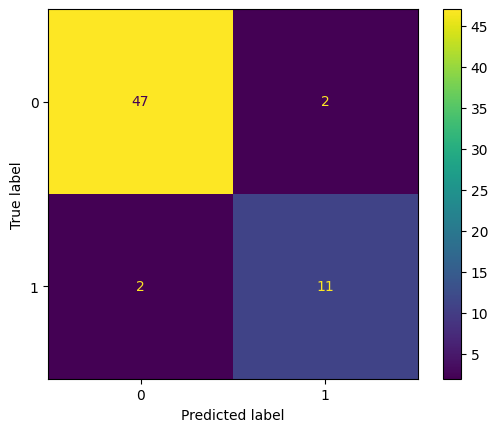

In [374]:
ConfusionMatrixDisplay(confusion_matrix(y_test, predicao_dtc)).plot()

Modelo usando árvore de decisão performou muito bem, inclusive a classe 'Sim'

### Visualizando modelo

[Text(0.6333333333333333, 0.9285714285714286, 'Você encontra o que precisa/esperava ao pesquisar? <= 1.5\ngini = 0.292\nsamples = 186\nvalue = [153, 33]\nclass = 0'),
 Text(0.5666666666666667, 0.7857142857142857, 'Com que frequência você vai aos museus? <= 3.5\ngini = 0.499\nsamples = 63\nvalue = [30, 33]\nclass = 1'),
 Text(0.6, 0.8571428571428572, 'True  '),
 Text(0.26666666666666666, 0.6428571428571429, 'Com que frequência você vai aos museus? <= 2.5\ngini = 0.358\nsamples = 30\nvalue = [7, 23]\nclass = 1'),
 Text(0.13333333333333333, 0.5, 'Com que frequência você vai aos museus? <= 0.5\ngini = 0.5\nsamples = 8\nvalue = [4, 4]\nclass = 0'),
 Text(0.06666666666666667, 0.35714285714285715, 'gini = 0.0\nsamples = 3\nvalue = [0, 3]\nclass = 1'),
 Text(0.2, 0.35714285714285715, 'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria. <= 1.0\ngini = 0.32\nsamples = 5\nvalue = [4, 1]\nclass = 0'),
 Text(0.13333333333333

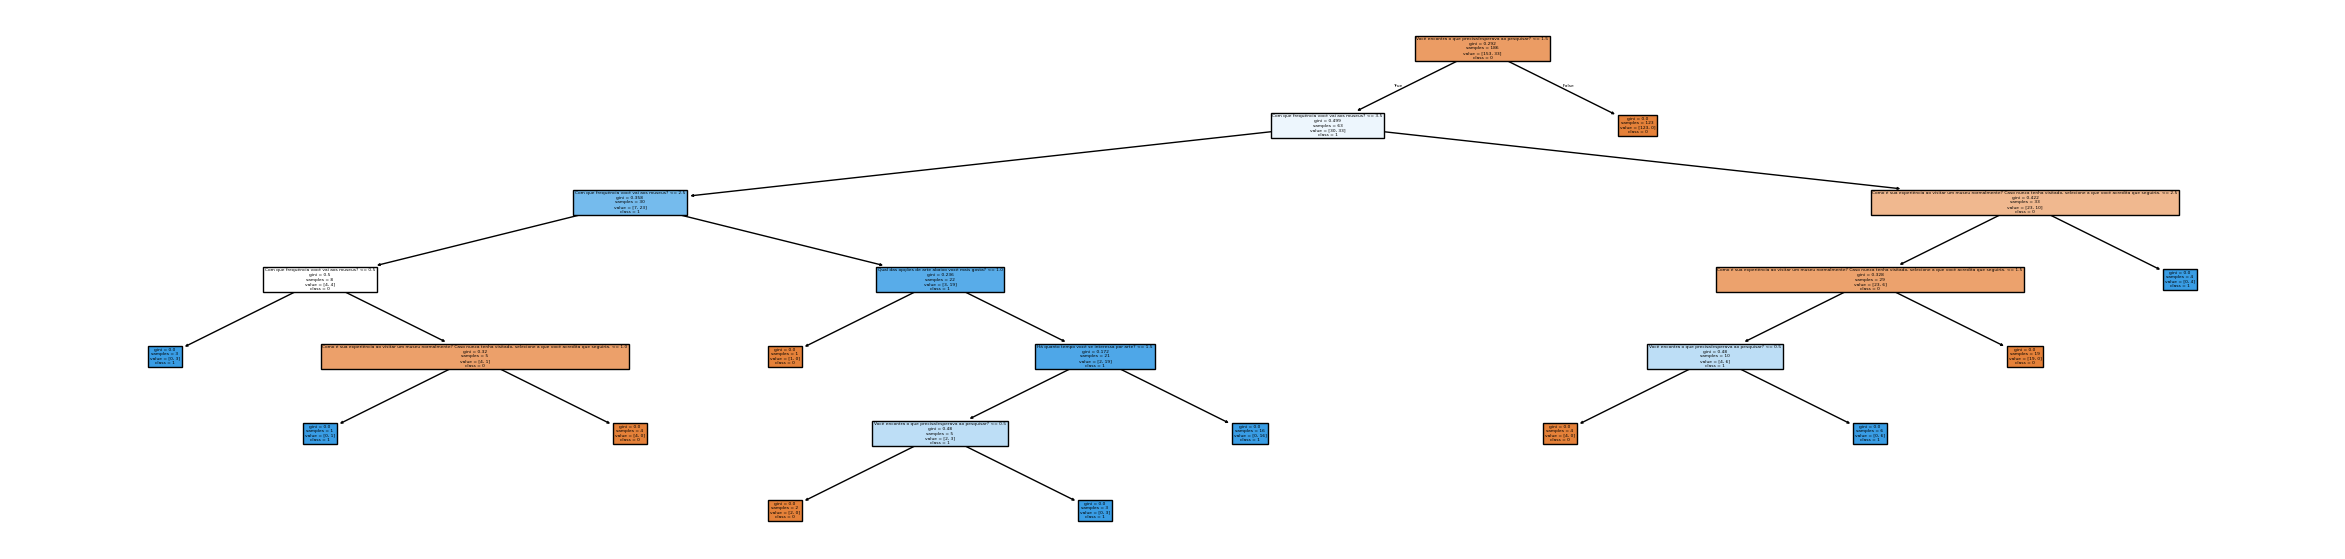

In [375]:
from sklearn import tree

plt.figure(figsize=(30,7))
classes = [str(x) for x in dtc.classes_]

tree.plot_tree(dtc, 
               feature_names=list(df_x.columns), 
               class_names=classes, filled=True)

### Kfold e Cross Validation


--- Fold 0 ---
              precision    recall  f1-score   support

         Não       0.98      0.95      0.96        57
         Sim       0.57      0.80      0.67         5

    accuracy                           0.94        62
   macro avg       0.78      0.87      0.82        62
weighted avg       0.95      0.94      0.94        62


--- Fold 1 ---
              precision    recall  f1-score   support

         Não       0.96      0.96      0.96        52
         Sim       0.80      0.80      0.80        10

    accuracy                           0.94        62
   macro avg       0.88      0.88      0.88        62
weighted avg       0.94      0.94      0.94        62


--- Fold 2 ---
              precision    recall  f1-score   support

         Não       0.98      1.00      0.99        46
         Sim       1.00      0.94      0.97        16

    accuracy                           0.98        62
   macro avg       0.99      0.97      0.98        62
weighted avg       0.98   

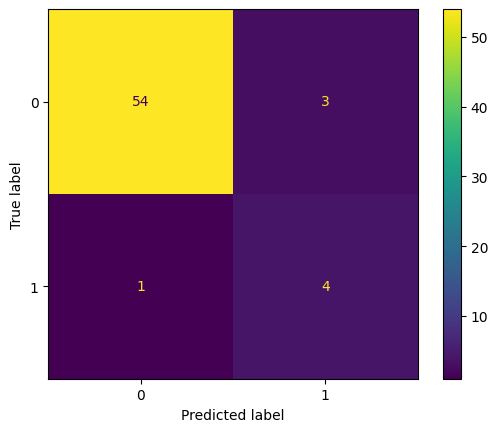

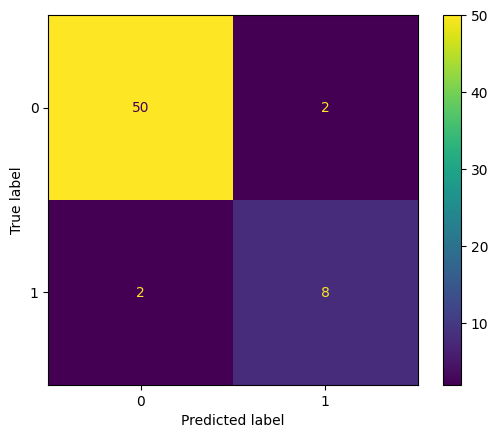

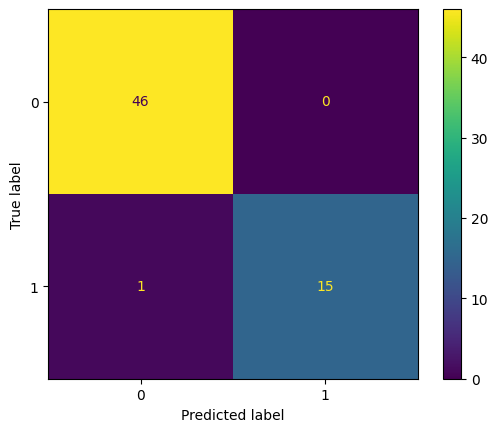

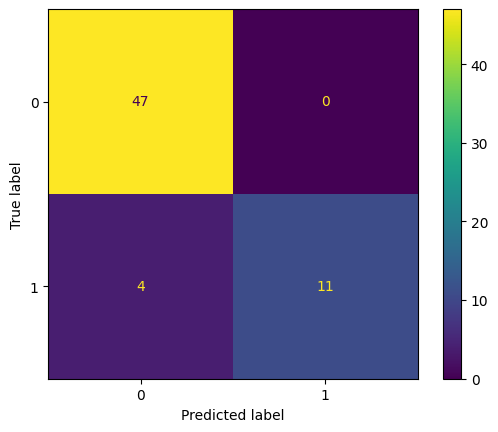

In [376]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=4, random_state=None, shuffle=False)
dtc = DecisionTreeClassifier()

lista_acuracias = []
lista_precisions = []

for i, (train_index, test_index) in enumerate(kf.split(df_x)):
    # Separando treino e teste de x e y
    train_x, test_x = df_x.iloc[train_index], df_x.iloc[test_index]
    train_y, test_y = df_y[train_index], df_y[test_index]

    # Treinando o modelo
    dtc.fit(train_x, train_y)

    # Predict
    predict = dtc.predict(test_x)

    # Avaliando modelo
    lista_acuracias.append(accuracy_score(test_y, predict))
    lista_precisions.append(precision_score(test_y, predict, pos_label=1))
    print(f'\n--- Fold {i} ---')
    print(classification_report(test_y, predict, target_names=list(le_y.classes_)))
    matriz_confusao = confusion_matrix(test_y, predict)
    matriz_confusao_display = ConfusionMatrixDisplay(matriz_confusao)
    matriz_confusao_display.plot()

In [377]:
print('Acurácia média: ', sum(lista_acuracias)/len(lista_acuracias))
print('Precision médio do "Sim": ', sum(lista_precisions)/len(lista_precisions))

Acurácia média:  0.9475806451612903
Precision médio do "Sim":  0.8428571428571429


Divisão do primeiro fold ficou muito ruim, já os outros acabaram tendo um recall inforior ao precision, porém ainda razoavelmente boas

## KNN

### Modelo

In [378]:
K = 5

In [379]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(x_train, y_train)
predicao_knn = knn.predict(x_test)

display(predicao_knn)

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0])

### Avaliando modelo

In [380]:
from sklearn.metrics import *

print(classification_report(y_test, predicao_knn, target_names=list(le_y.classes_)))

              precision    recall  f1-score   support

         Não       0.89      0.96      0.92        49
         Sim       0.78      0.54      0.64        13

    accuracy                           0.87        62
   macro avg       0.83      0.75      0.78        62
weighted avg       0.86      0.87      0.86        62



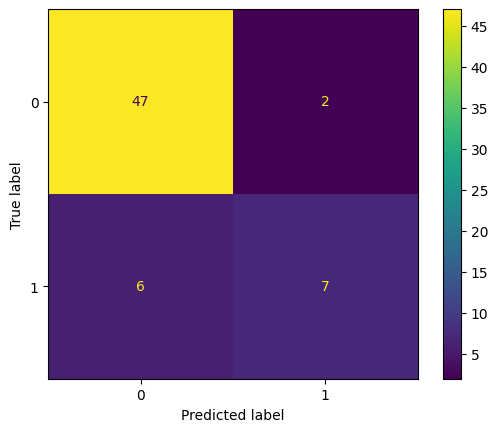

In [381]:
ConfusionMatrixDisplay(confusion_matrix(y_test, predicao_knn)).plot()

Teve uma péssima performance com a classe 'Sim', tanto no Recall quanto no Precision

### Kfold e Cross Validation


--- Fold 0 ---
              precision    recall  f1-score   support

         Não       0.97      1.00      0.98        57
         Sim       1.00      0.60      0.75         5

    accuracy                           0.97        62
   macro avg       0.98      0.80      0.87        62
weighted avg       0.97      0.97      0.96        62


--- Fold 1 ---
              precision    recall  f1-score   support

         Não       0.94      0.94      0.94        52
         Sim       0.70      0.70      0.70        10

    accuracy                           0.90        62
   macro avg       0.82      0.82      0.82        62
weighted avg       0.90      0.90      0.90        62


--- Fold 2 ---
              precision    recall  f1-score   support

         Não       0.81      0.96      0.88        46
         Sim       0.75      0.38      0.50        16

    accuracy                           0.81        62
   macro avg       0.78      0.67      0.69        62
weighted avg       0.80   

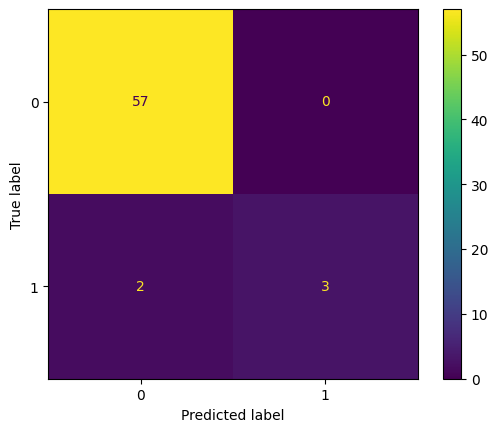

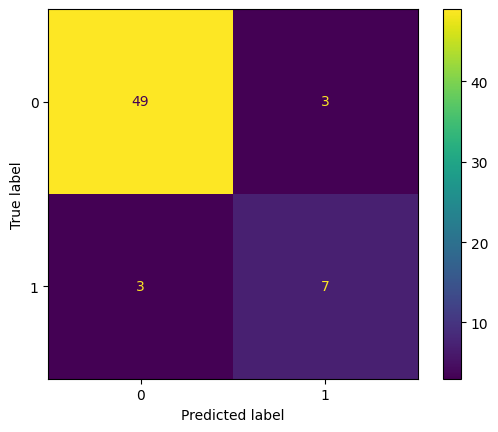

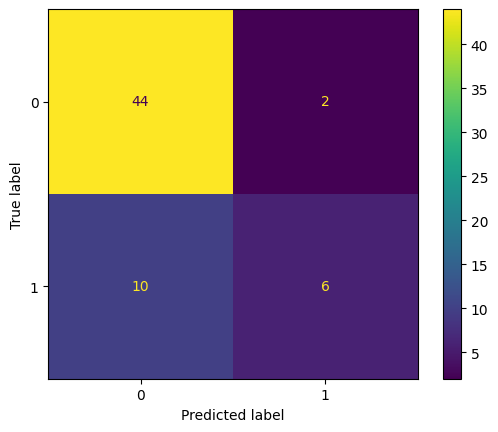

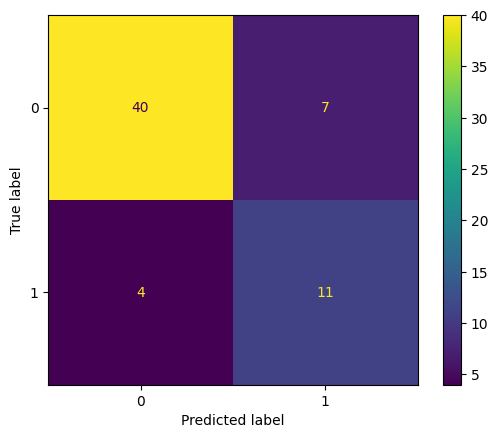

In [382]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=4, random_state=None, shuffle=False)
knn = KNeighborsClassifier(n_neighbors=K)

lista_acuracias = []
lista_precisions = []

for i, (train_index, test_index) in enumerate(kf.split(df_x)):
    # Separando treino e teste de x e y
    train_x, test_x = df_x.iloc[train_index], df_x.iloc[test_index]
    train_y, test_y = df_y[train_index], df_y[test_index]

    # Treinando o modelo
    knn.fit(train_x, train_y)

    # Predict
    predict = knn.predict(test_x)

    # Avaliando modelo
    lista_acuracias.append(accuracy_score(test_y, predict))
    lista_precisions.append(precision_score(test_y, predict, pos_label=1))
    print(f'\n--- Fold {i} ---')
    print(classification_report(test_y, predict, target_names=list(le_y.classes_)))
    matriz_confusao = confusion_matrix(test_y, predict)
    matriz_confusao_display = ConfusionMatrixDisplay(matriz_confusao)
    matriz_confusao_display.plot()

In [383]:
print('Acurácia média: ', sum(lista_acuracias)/len(lista_acuracias))
print('Precision médio do "Sim": ', sum(lista_precisions)/len(lista_precisions))

Acurácia média:  0.8750000000000001
Precision médio do "Sim":  0.7652777777777778


Péssima performance em todos os folds com a classe 'Sim'

In [384]:
import matplotlib.pyplot as plt

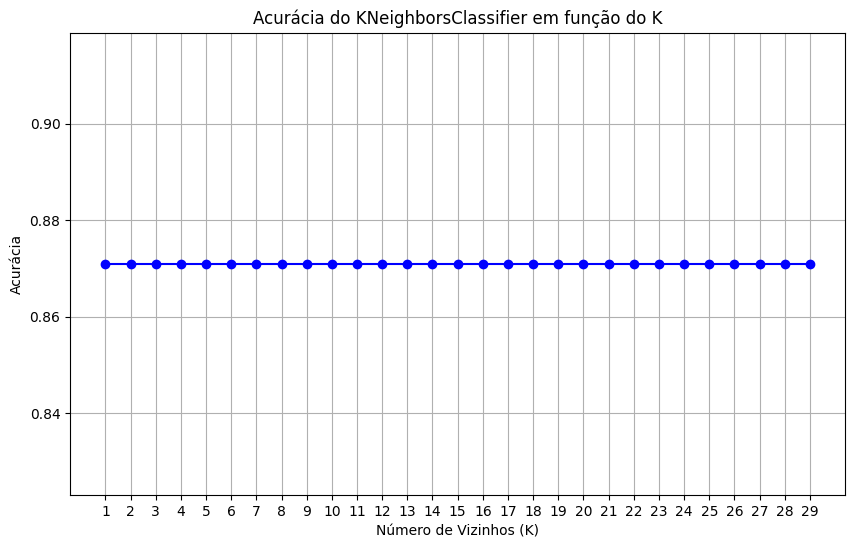

In [385]:
acuracias = []
intervalo = range(1, 30)
for k in intervalo:
    knn = KNeighborsClassifier(n_neighbors=K)
    knn.fit(x_train, y_train)
    predict = knn.predict(x_test)
    acuracias.append(accuracy_score(y_test, predict))

lista_acuracias = list(intervalo)

plt.figure(figsize=(10, 6))
plt.plot(lista_acuracias, acuracias, marker='o', linestyle='-', color='b')
plt.title('Acurácia do KNeighborsClassifier em função do K')
plt.xlabel('Número de Vizinhos (K)')
plt.ylabel('Acurácia')
plt.xticks(lista_acuracias)
plt.grid(True)
plt.show()

#### A acurácia não muda com o número de vizinhos, apenas utilizando diferentes treinos e testes

## Conclusão

Apesar de todos os modelos terem uma boa acurácia, para o modelo supervisionado no nosso caso é interessante utilizar um algoritmo que leva em consideração o valor dos dados e não apenas sua frequência na base, já que para definir se uma pessoa é um possível usuário de nosso aplicativo, olhamos para características mais atrativas e damos um peso maior a elas, já para aspectos negativos como baixa ida a museus, desinteresse em arte ou se sentir satisfeito com as informações das obras que já estão nos museus, por exemplo, damos pontuações mais baixas e até as vezes, negativas.
Olhando por este lado, é prefirível usar a regressão linear ou o KNN. Visto que o KNN faz o cálculo das distâncias dos novos dados em relação aos de treino e assim definindo 

# Modelo com KNN

In [386]:
df_y_2, df_x_2 = dados['Usaria o aplicativo?'], dados.drop(columns=['Usaria o aplicativo?'])
display(df_x_2.head())
display(df_y_2.head())

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,Menos de 18 anos,"Classes D/E: até R$ 2,9 mil",Menos de 2 anos,Fotografia,Raramente (uma vez ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Sim, procuro","Busca em navegadores (Google, Yahoo, Edge, Ope...",Não
1,Entre 25 e 35 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",Não me interesso,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Menos de 18 anos,"Classe C: entre R$ 2,9 mil e R$ 7,1 mil",De 2 a 4 anos,Escultura,Ocasionalmente (máximo três vezes ao ano),Sim,Sim,Sem um guia/planejamento para ver as obras.,Não,Aprendizado,"Não, acredito que o que tem no museu é o sufic...",NaN,NaN,NaN
3,Menos de 18 anos,"Classe B: entre R$ 7,1 mil e R$ 22 mil",Estou iniciando agora,Pintura,Ocasionalmente (máximo três vezes ao ano),Não,Sim,Sem um guia/planejamento para ver as obras.,Não,Lazer,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN
4,Entre 46 e 59 anos,Classe A: superior a R$ 22 mil,Há mais de 10 anos,Fotografia,Muito frequentemente (mais de cinco vezes ao ano),Sim,Não,Planejo minha rota antes.,Sim,Inspiração,"Sim, sinto falta de mais informações","Não, apenas me conformo",NaN,NaN


0    Não
1    Não
2    Não
3    Não
4    Não
Name: Usaria o aplicativo?, dtype: object

## Tratando dados

In [387]:
df_x_2.fillna("#", inplace=True)

#### Aplicando os pesos

In [388]:
mapeamento_tipo_arte = {'#': 0, 'Pintura': 8, 'Fotografia': 8, 'Escultura': 6, 'Arquitetura e Urbanismo': 5, 'Arte digital': 3,'Arte de rua/grafite': 2}
mapeamento_frequencia = {'#': 0, 'Frequentemente (máximo cinco vezes ao ano)': 20,'Muito frequentemente (mais de cinco vezes ao ano)': 20,'Ocasionalmente (máximo três vezes ao ano)': 17,'Raramente (uma vez ao ano)': 3,'Nunca': 1}
mapeamento_guia = {'#': 0, 'Planejo minha rota antes.': 45, 'Utilizo o planejamento de terceiros (sites, blogs, páginas em redes sociais que disponibilizam).': 40, 'Com um guia do próprio museu.': 40, 'Sem um guia/planejamento para ver as obras.': -3}
mapeamento_motivo = {'#': 0, 'Aprendizado': 10, 'Inspiração': 9, 'Lazer': 6, 'Apenas acompanho alguém': 3, 'Não visito': 1}
mapeamento_falta_info = {'#': 0, 'Sim, sinto falta de mais informações': 18, 'Não, acredito que o que tem no museu é o suficiente': -1}
mapeamento_procurar_info = {'#': 0, 'Sim, procuro': 12, 'Não, apenas me conformo': 0}
mapeamento_achar_info = {'#': 0, 'Sim': 2, 'Não': 10}
mapeamento = {'Qual das opções de arte abaixo você mais gosta?': mapeamento_tipo_arte, 'Com que frequência você vai aos museus?': mapeamento_frequencia, 'Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.': mapeamento_guia, 'O que mais te atrai em visitar museus ou exposições de arte?': mapeamento_motivo, 'Você sente falta de mais informações sobre as obras nos museus?': mapeamento_falta_info, 'Você procura saber sobre essas informações faltantes?': mapeamento_procurar_info, 'Você encontra o que precisa/esperava ao pesquisar?': mapeamento_achar_info}
for i in df_x_2:
    if df_x_2[i].dtype == object:
        if i in mapeamento.keys():
            df_x_2[i] = df_x_2[i].map(mapeamento[i])
        else:
            dicio_unicos = {}
            unicos = list(df_x_2[i].unique())
            for k, v in enumerate(unicos):
                dicio_unicos[v] = k
            df_x_2[i] = df_x_2[i].map(dicio_unicos)

mapeamento_usaria_app = {'Sim': 1, 'Não': 0}
df_y_2 = df_y_2.map(mapeamento_usaria_app)
    

In [389]:
display(df_x_2)
display(df_y_2)

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
0,0,0,0,8,3,0,0,-3,0,6,18,12,0,10
1,1,1,1,0,0,1,1,0,1,0,0,0,1,0
2,0,1,2,6,17,2,0,-3,0,10,-1,0,1,0
3,0,2,3,8,17,0,0,-3,0,6,18,0,1,0
4,2,3,4,8,20,2,2,45,2,9,18,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
243,5,1,4,8,17,0,2,-3,0,9,-1,0,1,0
244,1,1,3,8,3,0,2,-3,0,10,-1,0,1,0
245,0,2,3,8,3,0,0,-3,0,9,18,12,0,10
246,3,2,0,3,3,0,2,-3,0,6,18,0,1,0


0      0
1      0
2      0
3      0
4      0
      ..
243    0
244    0
245    0
246    0
247    0
Name: Usaria o aplicativo?, Length: 248, dtype: int64

## Modelo básico

### Dividindo entre treino e teste

In [390]:
from sklearn.model_selection import train_test_split


x_train, x_test, y_train, y_test = train_test_split(df_x_2, df_y_2, test_size=0.25, random_state=SEED)

display(x_train.head())
display(y_train)
display(x_test.head())
display(y_test)
print("Quantidade de linhas do treino: ", x_train.shape[0])
print("Quantidade de linhas do teste: ", x_test.shape[0])

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
101,0,1,1,0,0,1,1,0,1,0,0,0,1,0
198,3,1,1,0,0,1,1,0,1,0,0,0,1,0
126,0,3,1,0,0,1,1,0,1,0,0,0,1,0
69,0,2,4,8,3,2,0,-3,0,6,-1,0,1,0
201,1,1,1,0,0,1,1,0,1,0,0,0,1,0


101    0
198    0
126    0
69     0
201    0
      ..
106    0
14     0
92     0
179    0
102    0
Name: Usaria o aplicativo?, Length: 186, dtype: int64

,Em qual faixa etária você se encaixa?,Qual a renda per capita da sua casa? (A renda per capita é calculada somando a renda de cada indivíduo da casa e dividindo pela quantidade de pessoas),Há quanto tempo você se interessa por arte?,Qual das opções de arte abaixo você mais gosta?,Com que frequência você vai aos museus?,Você já participou de algum curso ou atividade relacionada à arte?,Você segue artístas ou páginas relacionadas à arte nas rede sociais?,"Como é sua experiência ao visitar um museu normalmente? Caso nunca tenha visitado, selecione a que você acredita que seguiria.",Você já usou um aplicativo de um museu ou relacionado à arte?,O que mais te atrai em visitar museus ou exposições de arte?,Você sente falta de mais informações sobre as obras nos museus?,Você procura saber sobre essas informações faltantes?,De que forma você costuma buscar essas informações?,Você encontra o que precisa/esperava ao pesquisar?
33,0,1,2,8,1,0,0,-3,0,9,-1,0,1,0
6,3,3,1,0,0,1,1,0,1,0,0,0,1,0
182,1,1,5,8,17,0,2,45,0,6,18,12,0,2
86,0,2,1,0,0,1,1,0,1,0,0,0,1,0
156,0,1,2,8,3,0,0,40,0,9,18,12,0,2


33     0
6      0
182    1
86     0
156    1
      ..
193    0
97     1
154    1
75     0
82     0
Name: Usaria o aplicativo?, Length: 62, dtype: int64

Quantidade de linhas do treino:  186
Quantidade de linhas do teste:  62


### Aplicando modelo

In [401]:
from sklearn.neighbors import KNeighborsClassifier

K = 5

knn = KNeighborsClassifier(n_neighbors=K)
knn.fit(x_train, y_train)
predicao_knn = knn.predict(x_test)

display(predicao_knn)

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0], dtype=int64)

### Avaliando

In [402]:
from sklearn.metrics import *

print(classification_report(y_test, predicao_knn, target_names=list(le_y.classes_)))

              precision    recall  f1-score   support

         Não       1.00      1.00      1.00        49
         Sim       1.00      1.00      1.00        13

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



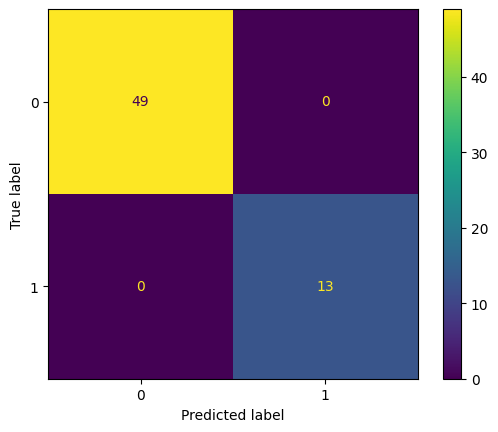

In [393]:
ConfusionMatrixDisplay(confusion_matrix(y_test, predicao_knn)).plot()

## Modelo usando Cross Validation 

### Kfold e Cross Validation

1.0
0.967741935483871
0.9838709677419355
0.967741935483871


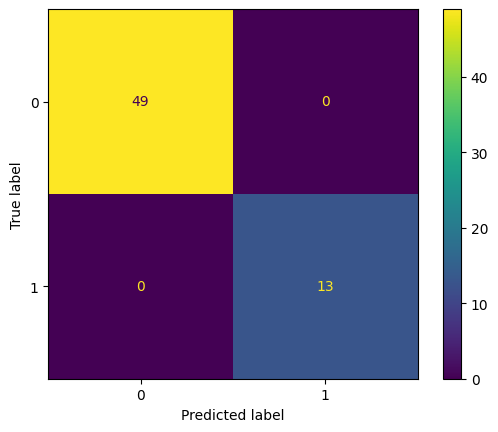

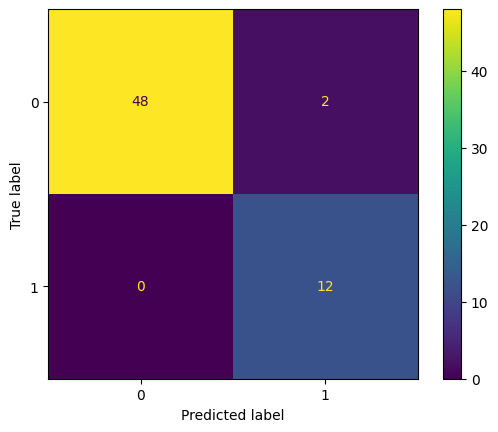

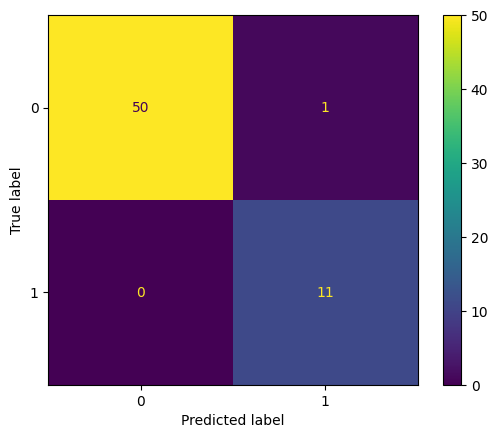

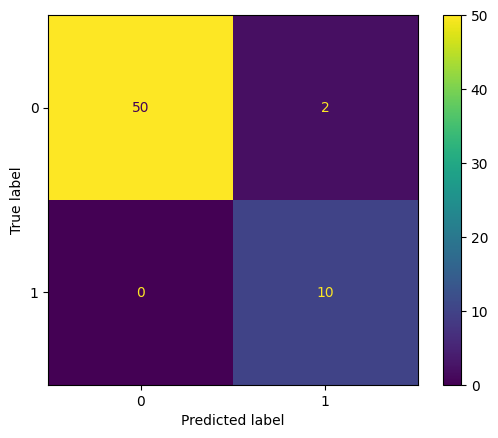

In [403]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

kf = KFold(n_splits=4, random_state=SEED, shuffle=True)
knn = KNeighborsClassifier(n_neighbors=K)

lista_acuracias = []
lista_precisions = []

for i, (train_index, test_index) in enumerate(kf.split(df_x)):
    # Separando treino e teste de x e y
    train_x, test_x = df_x_2.iloc[train_index], df_x_2.iloc[test_index]
    train_y, test_y = df_y_2[train_index], df_y_2[test_index]

    # Treinando o modelo
    knn.fit(train_x, train_y)

    # Predict
    predict = knn.predict(test_x)

    # Avaliando modelo
    lista_acuracias.append(accuracy_score(test_y, predict))
    lista_precisions.append(precision_score(test_y, predict))
    print(accuracy_score(test_y, predict))
    matriz_confusao = confusion_matrix(test_y, predict)
    matriz_confusao_display = ConfusionMatrixDisplay(matriz_confusao)
    matriz_confusao_display.plot()

In [395]:
print('Acurácia média: ', sum(lista_acuracias)/len(lista_acuracias))
print('Precision médio de "Sim": ', sum(lista_precisions)/len(lista_precisions))

Acurácia média:  0.8830645161290323
Precision médio de "Sim":  0.7634469696969698


### GridSearchCV

In [404]:
from sklearn.model_selection import GridSearchCV

parametros = {
    'n_neighbors': list(range(2, 11)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': list(range(15, 46))
}

knn = KNeighborsClassifier()

grid = GridSearchCV(estimator=knn, param_grid=parametros, scoring='accuracy')

grid.fit(x_train, y_train)

print("Melhores hiperparâmetros:", grid.best_params_)
print("Melhor acurácia:", grid.best_score_)

Melhores hiperparâmetros: {'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 2, 'weights': 'distance'}
Melhor acurácia: 0.9945945945945945


              precision    recall  f1-score   support

         Não       1.00      0.96      0.98        49
         Sim       0.87      1.00      0.93        13

    accuracy                           0.97        62
   macro avg       0.93      0.98      0.95        62
weighted avg       0.97      0.97      0.97        62



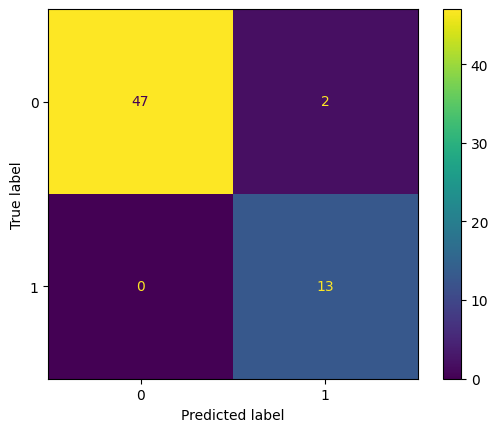

In [406]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 7, algorithm = 'ball_tree', leaf_size = 37, weights = 'uniform')
knn.fit(x_train, y_train)
predicao_knn = knn.predict(x_test)

print(classification_report(y_test, predicao_knn, target_names=list(le_y.classes_)))
ConfusionMatrixDisplay(confusion_matrix(y_test, predicao_knn)).plot()

### Cross Validation com KFold e GridSearchCV

In [410]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

kf = KFold(n_splits=4, random_state=SEED, shuffle=True)
knn = KNeighborsClassifier()
parametros = {
    'n_neighbors': list(range(2, 11)),
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'leaf_size': list(range(15, 46))
}

melhor_fold = {}
melhor_acuracia = 0

for i, (train_index, test_index) in enumerate(kf.split(df_x)):
    print(f"--- Fold {i} ---")

    # Separando treino e teste de x e y
    train_x, test_x = df_x.iloc[train_index], df_x.iloc[test_index]
    train_y, test_y = df_y[train_index], df_y[test_index]

    # Aplicando GridSearchCV
    grid = GridSearchCV(estimator=knn, param_grid=parametros, scoring='accuracy')
    grid.fit(train_x, train_y)

    # Mostrando melhores parâmetros e acurácia
    print("Melhores hiperparâmetros:", grid.best_params_)
    print("Melhor acurácia:", grid.best_score_)

    if grid.best_score_ > melhor_acuracia:
        melhor_acuracia = grid.best_score_
        
        # Armazenando melhores parâmetros e acurácia
        melhor_fold['parametros'] = (grid.best_params_)
        melhor_fold['acuracia'] = (grid.best_score_)

        # Armazenando treino e teste
        melhor_fold['treino'] = ((train_x, train_y))
        melhor_fold['teste'] = ((test_x, test_y))

--- Fold 0 ---
Melhores hiperparâmetros: {'algorithm': 'auto', 'leaf_size': 38, 'n_neighbors': 8, 'weights': 'uniform'}
Melhor acurácia: 0.8870554765291608
--- Fold 1 ---
Melhores hiperparâmetros: {'algorithm': 'auto', 'leaf_size': 38, 'n_neighbors': 4, 'weights': 'distance'}
Melhor acurácia: 0.8544807965860597
--- Fold 2 ---
Melhores hiperparâmetros: {'algorithm': 'auto', 'leaf_size': 37, 'n_neighbors': 6, 'weights': 'distance'}
Melhor acurácia: 0.8815078236130868
--- Fold 3 ---
Melhores hiperparâmetros: {'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 6, 'weights': 'distance'}
Melhor acurácia: 0.9029871977240399


In [411]:
melhor_fold['parametros']

{'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 6, 'weights': 'distance'}

### Modelo com os melhores parâmetros e melhor fold

In [415]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = melhor_fold['parametros']['n_neighbors'], algorithm = melhor_fold['parametros']['algorithm'], leaf_size = melhor_fold['parametros']['leaf_size'], weights = melhor_fold['parametros']['weights'])
knn.fit(melhor_fold['treino'][0], melhor_fold['treino'][1])
predicao_knn = knn.predict(melhor_fold['teste'][0])

display(predicao_knn)

{'algorithm': 'auto', 'leaf_size': 15, 'metric': 'minkowski', 'metric_params': None, 'n_jobs': None, 'n_neighbors': 6, 'p': 2, 'weights': 'distance'}


array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0])

In [413]:
from sklearn.metrics import *

print(classification_report(melhor_fold['teste'][1], predicao_knn, target_names=list(le_y.classes_)))

              precision    recall  f1-score   support

         Não       0.91      0.92      0.91        52
         Sim       0.56      0.50      0.53        10

    accuracy                           0.85        62
   macro avg       0.73      0.71      0.72        62
weighted avg       0.85      0.85      0.85        62



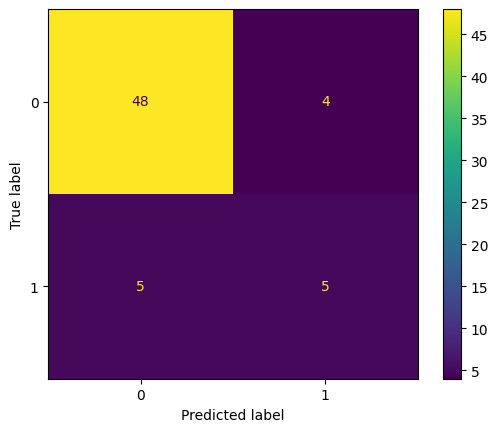

In [414]:
ConfusionMatrixDisplay(confusion_matrix(melhor_fold['teste'][1], predicao_knn)).plot()

### Cross Validation com KFold e GridSearchCV

In [637]:
# from sklearn.model_selection import cross_val_score
# from sklearn.model_selection import KFold
# from sklearn.model_selection import GridSearchCV

# kf = KFold(n_splits=4, random_state=SEED, shuffle=True)
# knn = KNeighborsClassifier()
# parametros = {
#     'n_neighbors': list(range(2, 11)),
#     'weights': ['uniform', 'distance'],
#     'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
#     'leaf_size': list(range(15, 46))
# }

# pior_fold = {}
# pior_acuracia = 1

# for i, (train_index, test_index) in enumerate(kf.split(df_x)):
#     print(f"--- Fold {i} ---")

#     # Separando treino e teste de x e y
#     train_x, test_x = df_x.iloc[train_index], df_x.iloc[test_index]
#     train_y, test_y = df_y[train_index], df_y[test_index]

#     # Aplicando GridSearchCV
#     grid = GridSearchCV(estimator=knn, param_grid=parametros, scoring='accuracy')
#     grid.fit(train_x, train_y)

#     # Mostrando melhores parâmetros e acurácia
#     print("Melhores hiperparâmetros:", grid.best_params_)
#     print("Melhor acurácia:", grid.best_score_)

#     if grid.best_score_ < pior_acuracia:
#         pior_acuracia = grid.best_score_
        
#         # Armazenando melhores parâmetros e acurácia
#         pior_fold['parametros'] = (grid.best_params_)
#         pior_fold['acuracia'] = (grid.best_score_)

#         # Armazenando treino e teste
#         pior_fold['treino'] = ((train_x, train_y))
#         pior_fold['teste'] = ((test_x, test_y))

--- Fold 0 ---
Melhores hiperparâmetros: {'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 9, 'weights': 'uniform'}
Melhor acurácia: 0.9839260312944523
--- Fold 1 ---
Melhores hiperparâmetros: {'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 5, 'weights': 'uniform'}
Melhor acurácia: 0.972972972972973
--- Fold 2 ---
Melhores hiperparâmetros: {'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 6, 'weights': 'distance'}
Melhor acurácia: 0.9839260312944523
--- Fold 3 ---
Melhores hiperparâmetros: {'algorithm': 'auto', 'leaf_size': 15, 'n_neighbors': 8, 'weights': 'distance'}
Melhor acurácia: 0.9837837837837838


### Modelo com os piores parâmetros e pior fold

In [634]:
# from sklearn.neighbors import KNeighborsClassifier

# knn = KNeighborsClassifier(n_neighbors = pior_fold['parametros']['n_neighbors'], algorithm = pior_fold['parametros']['algorithm'], leaf_size = pior_fold['parametros']['leaf_size'], weights = pior_fold['parametros']['weights'])
# knn.fit(pior_fold['treino'][0], pior_fold['treino'][1])
# predicao_knn = knn.predict(pior_fold['teste'][0])

# display(predicao_knn)

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0])

In [635]:
# from sklearn.metrics import *

# print(classification_report(pior_fold['teste'][1], predicao_knn, target_names=classes_y))

              precision    recall  f1-score   support

         Não       1.00      1.00      1.00        39
         Sim       1.00      1.00      1.00        23

    accuracy                           1.00        62
   macro avg       1.00      1.00      1.00        62
weighted avg       1.00      1.00      1.00        62



In [639]:
# ConfusionMatrixDisplay(confusion_matrix(pior_fold['teste'][0], predicao_knn)).plot()

NameError: name 'pior_fold' is not defined